# IST 718: Big Data Analytics

- Professor: Daniel Acuna <deacuna@syr.edu>
- TAs: Tong Zeng <tozeng@syr.edu>, Priya Matnani <psmatnan@syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any of the answers either from your classmates or from the internet__
- You can put the homework files anywhere you want in your http://notebook.acuna.io workspace but _do not change_ the file names. The TAs and the professor use these names to grade your homework.
- Remove or comment out code that contain `raise NotImplementedError`. This is main to make the `assert` statement fail.
- The tests shown in some cells (i.e., `assert` statements) might not be the only ones used by the professor. Think about cases where your code should run even if it passess all hidden cases.
- Before downloading and submitting your work through Blackboard, remember to save and press `Validate` (or go to 
`Kernel`$\rightarrow$`Restart and Run All`). 
- Good luck!

# Part 1: Numpy

In this part of the homework, we will use `Numpy` for multiple tasks

In [1]:
# this cell imports all the necessary package for this notebook
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg

## Question 1.1:  (10 pts)

In this question, we will explore basic funcionality of Numpy with the goal of later comparing two matrices. To do this comparison, we will rely on computing the norm of a matrix. In particular, we will use the $L_{2,1}$ norm. Let's define the $L_{2,1}$ norm of a matrix A as follows

$$ \left\lVert A \right\rVert_{2,1} = \sum_{j=1}^{n} \left( \sum_{i=1}^{m} a_{ij}^2 \right)^{1/2} $$

For example, for 

$$ 
A = \left(\begin{array}{cc}
1 & -2\\
0 & 3 \\
-2 & -1
\end{array}\right)
$$

the $L_{2,1}$ norm is

$$\left\lVert A \right\rVert_{2,1} = \sqrt{1^2 + 0^2 + -2^2} + \sqrt{-2^2 + 3^2 + -1^2} = \sqrt{5} + \sqrt{14} \approx 5.98 $$

Implement the $L_{2,1}$ norm using only Numpy as a function `norm_21`. The function should return either `float` type or `numpy.float64` type.

This means that the following call

```python
norm_21(np.array([[1, -2], [0, 3], [-2, -1]]))
```

should return approximately `5.98`

**Solve this problem by combining `numpy` calls (do not use any for-loops or list comprehensions)**

In [2]:
def norm_21(A):
    # YOUR CODE HERE
    return np.sum(np.sqrt(np.sum(A**2,axis=0)))
    #return np.round(np.sum(np.sqrt(np.sum(A**2,axis=0))),2)
    #raise NotImplementedError()

In [3]:
A = np.array(np.array([[1, -2], [0, 3], [-2, -1]]))
#np.sum(np.sqrt(np.sum(A**2,axis=0)))
# try it here
norm_21(A)

5.9777253642737307

In [4]:
import inspect

A = np.array(np.array([[1, -2], [0, 3], [-2, -1]]))
B = np.array([[0]])

assert (type(norm_21(A)) == np.float64) or (type(norm_21(A)) == float)
assert norm_21(B) == 0
assert norm_21(A) == 5.9777253642737307
# 'for' statement should be used
assert 'for' not in inspect.getsource(norm_21)
assert norm_21(np.eye(100)) == 100
assert norm_21(np.eye(1000)) == 1000

-----

For the following questions, consider the following data:

Below, we define a training dataset for predicting income based on age and educational level codified as number of degrees. The number of degrees from 0 (high school), 1 (bachelor), 2 (masters), and 3 (ph.d.).

The feature or data matrix is already put in Numpy format with the first column being all 1s.

In [5]:
import numpy as np
X = np.array(
      [[  1.,  22.,   2.],
       [  1.,  47.,   1.],
       [  1.,  22.,   1.],
       [  1.,  22.,   0.],
       [  1.,  22.,   3.],
       [  1.,  44.,   1.],
       [  1.,  22.,   0.],
       [  1.,  34.,   1.],
       [  1.,  32.,   1.],
       [  1.,  32.,   3.],
       [  1.,  20.,   1.],
       [  1.,  27.,   3.],
       [  1.,  24.,   1.],
       [  1.,  26.,   3.],
       [  1.,  30.,   1.],
       [  1.,  26.,   2.],
       [  1.,  48.,   2.],
       [  1.,  29.,   1.],
       [  1.,  37.,   3.],
       [  1.,  36.,   2.],
       [  1.,  35.,   1.],
       [  1.,  26.,   0.],
       [  1.,  20.,   1.],
       [  1.,  21.,   3.],
       [  1.,  23.,   3.],
       [  1.,  40.,   0.],
       [  1.,  45.,   3.],
       [  1.,  38.,   3.],
       [  1.,  26.,   1.],
       [  1.,  20.,   3.],
       [  1.,  39.,   2.],
       [  1.,  46.,   2.],
       [  1.,  35.,   0.],
       [  1.,  21.,   1.],
       [  1.,  42.,   1.],
       [  1.,  43.,   0.],
       [  1.,  27.,   3.],
       [  1.,  31.,   2.],
       [  1.,  26.,   0.],
       [  1.,  41.,   2.],
       [  1.,  48.,   1.],
       [  1.,  34.,   0.],
       [  1.,  47.,   0.],
       [  1.,  26.,   1.],
       [  1.,  25.,   3.],
       [  1.,  47.,   2.],
       [  1.,  42.,   2.],
       [  1.,  41.,   0.],
       [  1.,  27.,   0.],
       [  1.,  45.,   3.],
       [  1.,  29.,   0.],
       [  1.,  34.,   2.],
       [  1.,  21.,   3.],
       [  1.,  34.,   2.],
       [  1.,  37.,   3.],
       [  1.,  43.,   1.],
       [  1.,  34.,   2.],
       [  1.,  34.,   0.],
       [  1.,  47.,   0.],
       [  1.,  35.,   0.],
       [  1.,  33.,   0.],
       [  1.,  34.,   1.],
       [  1.,  34.,   1.],
       [  1.,  21.,   1.],
       [  1.,  23.,   1.],
       [  1.,  27.,   3.],
       [  1.,  37.,   1.],
       [  1.,  37.,   1.],
       [  1.,  34.,   2.],
       [  1.,  43.,   2.],
       [  1.,  28.,   0.],
       [  1.,  43.,   3.],
       [  1.,  21.,   1.],
       [  1.,  49.,   0.],
       [  1.,  35.,   3.],
       [  1.,  47.,   2.],
       [  1.,  29.,   0.],
       [  1.,  22.,   0.],
       [  1.,  38.,   3.],
       [  1.,  29.,   1.],
       [  1.,  41.,   1.],
       [  1.,  44.,   1.],
       [  1.,  26.,   3.],
       [  1.,  35.,   0.],
       [  1.,  49.,   3.],
       [  1.,  29.,   1.],
       [  1.,  46.,   0.],
       [  1.,  22.,   1.],
       [  1.,  38.,   1.],
       [  1.,  21.,   3.],
       [  1.,  29.,   2.],
       [  1.,  30.,   2.],
       [  1.,  39.,   3.],
       [  1.,  31.,   0.],
       [  1.,  36.,   1.],
       [  1.,  25.,   1.],
       [  1.,  42.,   3.],
       [  1.,  22.,   1.],
       [  1.,  20.,   1.],
       [  1.,  47.,   1.]])
income = np.array([[  66077.],
       [  78594.],
       [  61151.],
       [  39011.],
       [  72675.],
       [  69049.],
       [  38708.],
       [  57436.],
       [  58737.],
       [  91587.],
       [  50561.],
       [  80245.],
       [  49769.],
       [  73369.],
       [  60849.],
       [  59974.],
       [ 100509.],
       [  58719.],
       [ 109082.],
       [  72713.],
       [  62639.],
       [  44629.],
       [  52598.],
       [  79928.],
       [  74151.],
       [  54630.],
       [ 105905.],
       [  94279.],
       [  51266.],
       [  77551.],
       [  75971.],
       [  99337.],
       [  42135.],
       [  57466.],
       [  63880.],
       [  54419.],
       [  73602.],
       [  74729.],
       [  48554.],
       [  84530.],
       [  76958.],
       [  50145.],
       [  60562.],
       [  62692.],
       [  93035.],
       [  96479.],
       [  89171.],
       [  52864.],
       [  44414.],
       [ 110402.],
       [  33642.],
       [  73758.],
       [  78661.],
       [  82172.],
       [ 102208.],
       [  70664.],
       [  88328.],
       [  49423.],
       [  65059.],
       [  46798.],
       [  47284.],
       [  65042.],
       [  63681.],
       [  48776.],
       [  56904.],
       [  85534.],
       [  65455.],
       [  74998.],
       [  75279.],
       [  94335.],
       [  40767.],
       [ 107563.],
       [  54427.],
       [  65258.],
       [  89377.],
       [  90106.],
       [  44609.],
       [  40783.],
       [ 101304.],
       [  65651.],
       [  60830.],
       [  71901.],
       [  86211.],
       [  40302.],
       [ 105743.],
       [  57660.],
       [  54564.],
       [  57149.],
       [  68707.],
       [  76235.],
       [  76907.],
       [  71769.],
       [ 102240.],
       [  42132.],
       [  65735.],
       [  56230.],
       [ 106108.],
       [  58697.],
       [  54416.],
       [  68546.]])

def mse(X, b, y):
    ypred = X.dot(b)
    e = y - ypred
    n = X.shape[0]
    return (2/n)*(e.T.dot(e))[0, 0]

len(income)

100

# Question 1.3: (10 pts)

If we define a linear function for the income prediction problem above:

$$ \hat{income} = b_0 + b_1 \text{age} + b_2 \text{degree} $$

Assume that $b_0 = 15000$ and $b_2 = 15000$. Using any method you want, create a plot where the $x$ axis is $b_1$ and the y axis is the mean squared error for the data above. Use the `mse` error defined above. Create this plot using `plt.plot`. Create an appropriate title, and labels for x and y axes.

In particular, evaluate the mean square error for $b_1$ as it varies in the range from 500 to 1500:

In [6]:
# plot the MSE over this range of b_1
b_1 = np.array(range(500, 1500, 50))
b_1

array([ 500,  550,  600,  650,  700,  750,  800,  850,  900,  950, 1000,
       1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450])

**Hint: to answer this question you can use list comprehension to construct a numpy matrix with one column being the $x$ axis and the other being the $y$ of your plot**

The plot should look something like this
![image.png](attachment:image.png)

[609530012.91999996, 501414288.92000002, 405044464.92000002, 320420540.92000002, 247542516.92000002, 186410392.92000002, 137024168.92000002, 99383844.920000002, 73489420.920000002, 59340896.920000002, 56938272.920000002, 66281548.920000002, 87370724.920000002, 120205800.92, 164786776.92000002, 221113652.92000002, 289186428.92000002, 369005104.92000002, 460569680.92000002, 563880156.91999996]


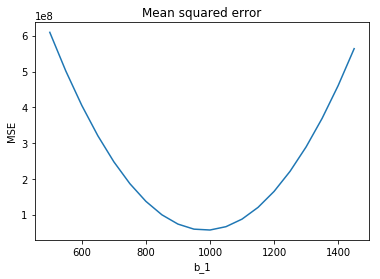

In [7]:
plt.title('Mean squared error');
# YOUR CODE HERE
mse_arr =[]
for i in range(len(b_1)):
    mse_arr.append(mse(X,[[15000],[b_1[i]],[15000]],income))
print(mse_arr)
plt.plot(b_1,mse_arr)
#raise NotImplementedError()
plt.xlabel('b_1');
plt.ylabel('MSE');
plt.show()

# Question 1.4: (20 pts)

There is in fact a closed-form solution to linear regression that has the following form.

$$ \hat{b} = (X^TX)^{-1}X^Ty $$

where $\hat{b}$ is the minimum MSE estimation based on the data $X$ and $y$. Using this equation, define a Python function `estimate_b` which receives $X$ and $y$ and returns the estimated $b$. Assume that $X$ and $y$ have the correct dimensions. Use the function `inv` in the subpackage `numpy.linalg` to compute the inverse of a matrix --- i.e., $A^{-1}$ where $A = X^TX$.

For example, as we derived in class, the best $b$ for a model with only intercept is just the avereage $y$. So the following code

```python
X1 = np.array([[1], [1], [1]])
y1 = np.array([[10], [20], [30]])
print("estimate with intercept only example: b= ", estimate_b(X1, y1))
```

should return

```console
estimate with intercept only example: b=  [[ 20.]]
```

In [8]:
from numpy import linalg
# define the function here
def estimate_b(X, y):
    # YOUR CODE HERE
    return (linalg.inv(X.T.dot(X)).dot(X.T)).dot(y)
    #raise NotImplementedError()

In [9]:
# test it with the following example, which is a simple model 
# with only intercept. the resulting b should be just the average of y
X1 = np.array([[1], [1], [1]])
y1 = np.array([[10], [20], [30]])
print("estimate with intercept only example: b= ", estimate_b(X1, y1))

estimate with intercept only example: b=  [[ 20.]]


In [10]:
# a more complicated example from class relating age to income
X2 = np.array([[1, 30],
              [1, 20],
              [1, 33],
              [1, 25],
              [1, 50]])
y2 = np.array([[25000], [22000], [21000], [27000], [40000]])
print("estimate best b for class example: b= ", estimate_b(X2, y2))

estimate best b for class example: b=  [[ 9296.23944743]
 [  560.24558711]]


In [11]:
# the dimensions must be correct
assert estimate_b(np.random.random((10, 5)), np.random.random((10, 1))).shape == (5, 1)
assert estimate_b(np.random.random((10, 10)), np.random.random((10, 1))).shape == (10, 1)

# model with only intercept should give mean of y
fake_y = np.random.random((1000, 1))
np.testing.assert_almost_equal(estimate_b(np.ones((1000, 1)), fake_y)[0, 0], fake_y.mean())

# test example from class
X2 = np.array([[1, 30],
              [1, 20],
              [1, 33],
              [1, 25],
              [1, 50]])
y2 = np.array([[25000], [22000], [21000], [27000], [40000]])
np.testing.assert_almost_equal(estimate_b(X2, y2), np.array([[ 9296.23944743], [  560.24558711]]))

# Question 1.5: (25 pts)


In this question, you will realize that *you can fit any data with perfect MSE*. This will show you how important it is to compute MSE on data that you *did not* use during "fitting".

In particular, you will use the income data from Question 1.2 and you will show that by producing *random features* you can perfectly predict all subjects in the dataset.

First, you will define a function `mse_random_fit(y, m)` that takes any $y$ you want to predict --- e.g., income -- and the number of dimensions you want to use and it will return the `mse` of a random set of `m` features. You will follow these steps:

1. This function will generate a random matrix $X$, $n$ by $m$, $n$ being the number of points in $y$, of features using the `numpy.random.random` function. Do not worry about adding a first column of 1s.
1. Then, it will estimate the best $b$ based on the function `estimate_b` previously defined.
1. Finally, it will compute the MSE of that $b$ using the function `mse` from Question 1.2 and return it

In [12]:
def mse_random_fit(y, m):
    n = y.shape[0]
    # YOUR CODE HERE
    X = np.random.random((n,m))
    b = estimate_b(X,y)
    return mse(X,b,y)
    #raise NotImplementedError
  

In [13]:
  mse_random_fit(np.array([[1]]), 1) 

0.0

For example, by definition the mse with one datapoint and dimension 1

```python
mse_random_fit(np.array([[1]]), 1)
```

should be almost zero

```console
0.0
```

In [14]:
np.testing.assert_almost_equal(mse_random_fit(np.array([[1]]), 1), 0)
np.testing.assert_almost_equal(mse_random_fit(np.array([[-100]]), 1), 0)
# income MSE with 1 feature should be relatively large
np.testing.assert_array_less(2004877429, mse_random_fit(income, 1))
# with 100 dimensions it should have MSE = 0
np.testing.assert_almost_equal(0, mse_random_fit(income, 100), decimal=2)

Use this function to plot how MSE decreases with the number of dimensions `m` for the income dataset. Because there are 100 income datapoints, the MSE at 100 dimensions should be almost zero

The plot should look something like this:
![image.png](attachment:image.png)

Text(0,0.5,'mse')

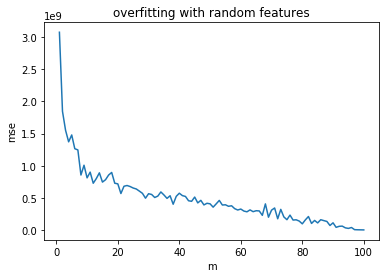

In [15]:
plt.title('overfitting with random features')
# YOUR CODE HERE
mse_arr1=[]
m=np.array(range(1,101))
for i in range(len(m)):
    mse_arr1.append(mse_random_fit(income,m[i]))
#print(mse_arr1)
#print(len(m))
plt.plot(m,mse_arr1)
#raise NotImplementedError()
plt.xlabel('m')
plt.ylabel('mse')